# Predicting R90 Redshifts using ANN:

In [1]:
# general imports:
from astropy.table import Column, Table, join
from matplotlib import pyplot as plt
from astropy.io import fits
import pandas as pd
import numpy as np

# ANN predictor imports:
from wise_ml.models import predictors

In [2]:
# 4 band photometric data from r90:
data_4 = pd.read_pickle('/Users/amandascbeck/Desktop/RESEARCH/AGN_Project/AGN_BBH_overlap/data/WISE_ML/predict_W1W2W3W4.pkl')
# 2 band photometric data from r90:
data_2 =  pd.read_pickle('/Users/amandascbeck/Desktop/RESEARCH/AGN_Project/AGN_BBH_overlap/data/WISE_ML/predict_W1W2.pkl')

## 4 Photometric Bands Predictions:

In [3]:
data_4['W1mag']

0          14.086000
1          14.522000
2          13.548000
3          15.212000
4          16.392000
             ...    
1225641    15.762000
1225642    15.098000
1225643    17.266001
1225644    15.588000
1225645    14.812000
Name: W1mag, Length: 1141935, dtype: float32

In [4]:
# input to predictor:
data_4.iloc[:, 1:9:2][:5]

,W1mag,W2mag,W3mag,W4mag
0,14.086,13.233,9.987,7.551
1,14.522,13.372,10.663,8.180
2,13.548,12.539,9.727,7.248
3,15.212,13.694,10.388,8.046
4,16.392,15.323,12.318,8.907


In [5]:
# predict redshift using a low predictor: 
redshift_4 = predictors.predict_redshift(data_4.iloc[:, 1:9:2],
                                         redshift_range = [0,1.5], 
                                         n_inputs = 4)

In [6]:
# checking if there are negative values:
redshift_4[redshift_4<0][:5]

array([-0.09230223, -0.03006798, -0.01403172, -0.02712008, -0.04165529],
      dtype=float32)

In [7]:
# putting it all together:
data_4['PREDICTED_REDSHIFT'] = redshift_4
data_4[:5]

,WISEA,W1mag,e_W1mag,W2mag,e_W2mag,W3mag,e_W3mag,W4mag,e_W4mag,PREDICTED_REDSHIFT
0,J000000.06-473835.1,14.086,0.027,13.233,0.028,9.987,0.048,7.551,0.155,0.240509
1,J000000.15+353104.1,14.522,0.030,13.372,0.031,10.663,0.102,8.180,0.246,0.797934
2,J000000.15-200427.7,13.548,0.026,12.539,0.025,9.727,0.053,7.248,0.131,0.388666
3,J000000.23-783204.1,15.212,0.031,13.694,0.028,10.388,0.055,8.046,0.183,1.315445
4,J000000.30-325326.7,16.392,0.065,15.323,0.087,12.318,0.353,8.907,0.429,1.024144


## 2 Photometric Bands Predictions:

In [8]:
# input to predictor length:
len(data_2.iloc[:, 1:6:2])

4282573

In [9]:
# predict redshift using a high predictor: 
redshift_2 = predictors.predict_redshift(data_2.iloc[:, 1:9:2], 
                                         redshift_range = [0,1.5], 
                                         n_inputs = 2)

In [10]:
# checking final length:
len(redshift_2)

4282573

In [11]:
# checking if there are negative values:
len(redshift_2[redshift_2<0])

448

In [12]:
# putting it all together:
data_2['PREDICTED_REDSHIFT'] = redshift_2
data_2[:5]

,WISEA,W1mag,e_W1mag,W2mag,e_W2mag,PREDICTED_REDSHIFT
0,J000000.00-165522.3,15.817000,0.048,14.934,0.066,0.867563
1,J000000.01-422938.4,16.774000,0.086,15.022,0.068,1.461351
2,J000000.04+033452.5,15.568000,0.047,14.800,0.077,0.739107
3,J000000.05-201340.3,17.705000,0.225,16.055,0.187,1.566276
4,J000000.06-223834.6,16.429001,0.078,15.079,0.086,1.309231


## Crossmatching Both Predictions:

In [13]:
# overlapping:
predict_overlap = data_2.merge(data_4, how='inner', on=['WISEA'])

In [14]:
# checking length (should be length of W1W2W3W4 data set):
len(predict_overlap)

1141935

## Plotting:

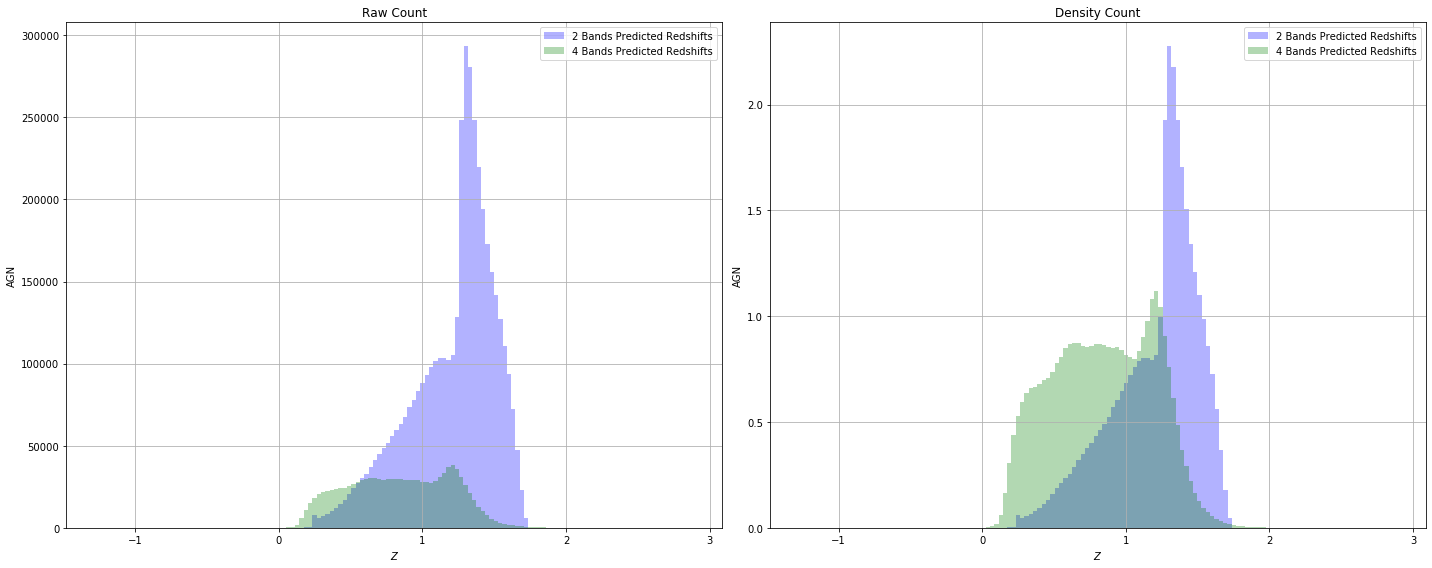

In [15]:
fig, (raw, density) = plt.subplots(1, 
                                   2, 
                                   figsize=[20,8], 
                                   tight_layout=True)

raw.hist(redshift_2, 
         bins=100, 
         label='2 Bands Predicted Redshifts', 
         alpha=0.3, 
         color='b')
raw.hist(redshift_4, 
         bins=100, 
         label='4 Bands Predicted Redshifts', 
         alpha=0.3, 
         color='g')
raw.set_xlabel('$Z$')
raw.set_ylabel('AGN')
raw.grid()
raw.legend()
raw.set_title('Raw Count')

density.hist(redshift_2, 
             bins=100, 
             label='2 Bands Predicted Redshifts', 
             alpha=0.3, 
             color='b', 
             density=True)
density.hist(redshift_4, 
             bins=100, 
             label='4 Bands Predicted Redshifts', 
             alpha=0.3, 
             color='g', 
             density=True)
density.set_xlabel('$Z$')
density.set_ylabel('AGN')
density.grid()
density.legend()
density.set_title('Density Count')

plt.savefig('plots/redshift_histograms.pdf', 
            overwrite=True)
plt.show()

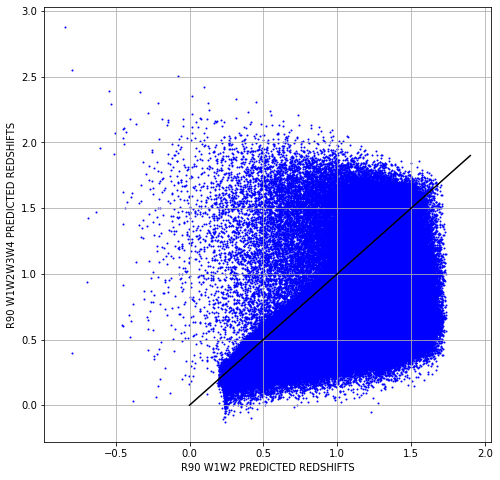

In [16]:
fig = plt.figure(figsize=[8,8])

plt.scatter(predict_overlap['PREDICTED_REDSHIFT_x'], 
            predict_overlap['PREDICTED_REDSHIFT_y'], 
            c='b', 
            s=1)
plt.plot(np.arange(0,2,0.1), 
         np.arange(0,2,0.1), 
         c='k')

plt.grid()
plt.xlabel('R90 W1W2 PREDICTED REDSHIFTS')
plt.ylabel('R90 W1W2W3W4 PREDICTED REDSHIFTS')

plt.savefig('plots/predicted_z_comparison.pdf')
plt.show()

## Creating Files with all r90 Columns and Redshift:

In [17]:
# # opening r90:
# full_wise_data = Table.read('/Users/amandascbeck/Desktop/RESEARCH/AGN_Project/AGN_BBH_overlap/data/r90_cat.fit')
# wise = full_wise_data.to_pandas()
# wise[:5]

In [18]:
# # decoding WISEA string:
# wise['WISEA'] = wise['WISEA'].str.decode('utf-8') 
# wise[:5]

### 2 Band Data:

In [19]:
# # getting all r90 columns by merging both tables:
# final_W1W2 = wise.merge(data_2, how='inner', on=['WISEA']) # inner merge keeps only overlapping rows!
# final_W1W2[:5]

The data type of Wmag columns in the predict files is float32. The data type in the r90 file is float64. The next steps deal with eliminating the float32 values and keeping the float64. In my understanding there is no simple way to just convert those dtypes!

In [20]:
# # dropping float32 columns:
# final_W1W2.drop(['W1mag_y', 'e_W1mag_y', 'W2mag_y', 'e_W2mag_y'], 
#                 axis=1, 
#                 inplace=True)

# # renaming float64 columns to match original names:
# final_W1W2.rename({'W1mag_x':'W1mag', 'e_W1mag_x':'e_W1mag', 'W2mag_x':'W2mag', 'e_W2mag_x':'e_W2mag'}, 
#                   axis=1, 
#                   inplace=True)
# final_W1W2[:5]

### 4 Band Data:

In [21]:
# final_W1W2W3W4 = wise.merge(data_4, 
#                             how='inner', 
#                             on=['WISEA'])
# final_W1W2W3W4[:5]

In [22]:
# # dropping float32 columns:
# final_W1W2W3W4.drop(['W1mag_y', 'e_W1mag_y', 'W2mag_y', 'e_W2mag_y', 'W3mag_y', 'e_W3mag_y', 'W4mag_y', 'e_W4mag_y'], 
#                     axis=1, 
#                     inplace=True)

# # renaming float64 columns to match original names:
# final_W1W2W3W4.rename({'W1mag_x':'W1mag', 'e_W1mag_x':'e_W1mag', 'W2mag_x':'W2mag', 'e_W2mag_x':'e_W2mag', 'W3mag_x':'W3mag', 'e_W3mag_x':'e_W3mag', 'W4mag_x':'W4mag', 'e_W4mag_x':'e_W4mag'}, 
#                       axis=1, 
#                       inplace=True)
# final_W1W2W3W4[:5]

### Finalizing:

In [23]:
# # converting from pandas to astropy Table to save files as .fits:
# final_2_table = Table.from_pandas(final_W1W2)
# final_4_table = Table.from_pandas(final_W1W2W3W4)

In [24]:
# # making final files with redshift values:
# final_2_table.write('../AGN_BBH_overlap/data/r90_W1W2_z.fits', 
#                     format='fits', 
#                     overwrite=True)
# final_4_table.write('../AGN_BBH_overlap/data/r90_W1W2W3W4_z.fits', 
#                     format='fits', 
#                     overwrite=True)

# Comparing Train/Test Data Redshifts with Predicted Redshifts

In [25]:
# 4 band photometric data from r90:
d4 = pd.read_pickle('/Users/amandascbeck/Desktop/RESEARCH/AGN_Project/WISE-ML/wise_ml/data/train_test_W1W2W3W4.pkl')
# 2 band photometric data from r90:
d2 = pd.read_pickle('/Users/amandascbeck/Desktop/RESEARCH/AGN_Project/WISE-ML/wise_ml/data/train_test_W1W2.pkl')

## 4 Band Train/Test Predictions:

In [26]:
# input to predictor:
d4.iloc[:, 2:10:2][:5]

,W1mag,W2mag,W3mag,W4mag
2,15.503,13.987,10.764,8.056
5,14.627,13.274,10.399,7.866
6,14.888,13.519,10.444,8.145
9,12.685,11.547,8.871,6.500
11,16.027,14.834,11.127,8.439


In [27]:
# predict redshift:
r4 = predictors.predict_redshift(d4.iloc[:, 2:9:2],
                                 redshift_range = [0,1.5], 
                                 n_inputs = 4)

In [28]:
# checking if there are negative values:
r4[r4<0]

array([-0.01416653], dtype=float32)

In [29]:
# putting it all together:
d4['PREDICTED_REDSHIFT'] = r4
d4[:5]

,REDSHIFT,WISEA,W1mag,e_W1mag,W2mag,e_W2mag,W3mag,e_W3mag,W4mag,e_W4mag,PREDICTED_REDSHIFT
2,1.61885,J000000.98+044947.1,15.503,0.044,13.987,0.044,10.764,0.112,8.056,0.205,1.326855
5,1.22700,J000001.26+070128.7,14.627,0.032,13.274,0.031,10.399,0.099,7.866,0.208,1.153596
6,1.35600,J000001.28-020159.7,14.888,0.034,13.519,0.035,10.444,0.088,8.145,0.259,1.209020
9,0.50800,J000002.92-350332.5,12.685,0.023,11.547,0.021,8.871,0.029,6.500,0.059,0.553846
11,1.81900,J000003.30+105744.5,16.027,0.058,14.834,0.070,11.127,0.153,8.439,0.362,0.829287


## 2 Band Train/Test Predictions:

In [30]:
# input to predictor:
d2.iloc[:, 2:6:2][:5]

,W1mag,W2mag
2,15.503,13.987
5,14.627,13.274
6,14.888,13.519
9,12.685,11.547
11,16.027,14.834


In [31]:
# predict redshift:
r2 = predictors.predict_redshift(d2.iloc[:, 2:6:2],
                                 redshift_range = [0,1.5], 
                                 n_inputs = 2)

In [32]:
# checking if there are negative values:
r2[r2<0]

array([], dtype=float32)

In [33]:
# putting it all together:
d2['PREDICTED_REDSHIFT'] = r2
d2[:5]

,REDSHIFT,WISEA,W1mag,e_W1mag,W2mag,e_W2mag,PREDICTED_REDSHIFT
2,1.61885,J000000.98+044947.1,15.503,0.044,13.987,0.044,1.350444
5,1.22700,J000001.26+070128.7,14.627,0.032,13.274,0.031,1.126387
6,1.35600,J000001.28-020159.7,14.888,0.034,13.519,0.035,1.203241
9,0.50800,J000002.92-350332.5,12.685,0.023,11.547,0.021,0.468318
11,1.81900,J000003.30+105744.5,16.027,0.058,14.834,0.070,1.200507


## Crossmatching Predictions:

In [34]:
# overlapping:
test_overlap = d2.merge(d4, how='inner', on=['WISEA'])
test_overlap[:5]

,REDSHIFT_x,WISEA,W1mag_x,e_W1mag_x,W2mag_x,e_W2mag_x,PREDICTED_REDSHIFT_x,REDSHIFT_y,W1mag_y,e_W1mag_y,W2mag_y,e_W2mag_y,W3mag,e_W3mag,W4mag,e_W4mag,PREDICTED_REDSHIFT_y
0,1.61885,J000000.98+044947.1,15.503,0.044,13.987,0.044,1.350444,1.61885,15.503,0.044,13.987,0.044,10.764,0.112,8.056,0.205,1.326855
1,1.22700,J000001.26+070128.7,14.627,0.032,13.274,0.031,1.126387,1.22700,14.627,0.032,13.274,0.031,10.399,0.099,7.866,0.208,1.153596
2,1.35600,J000001.28-020159.7,14.888,0.034,13.519,0.035,1.203241,1.35600,14.888,0.034,13.519,0.035,10.444,0.088,8.145,0.259,1.209020
3,0.50800,J000002.92-350332.5,12.685,0.023,11.547,0.021,0.468318,0.50800,12.685,0.023,11.547,0.021,8.871,0.029,6.500,0.059,0.553846
4,1.81900,J000003.30+105744.5,16.027,0.058,14.834,0.070,1.200507,1.81900,16.027,0.058,14.834,0.070,11.127,0.153,8.439,0.362,0.829287


## Plotting:

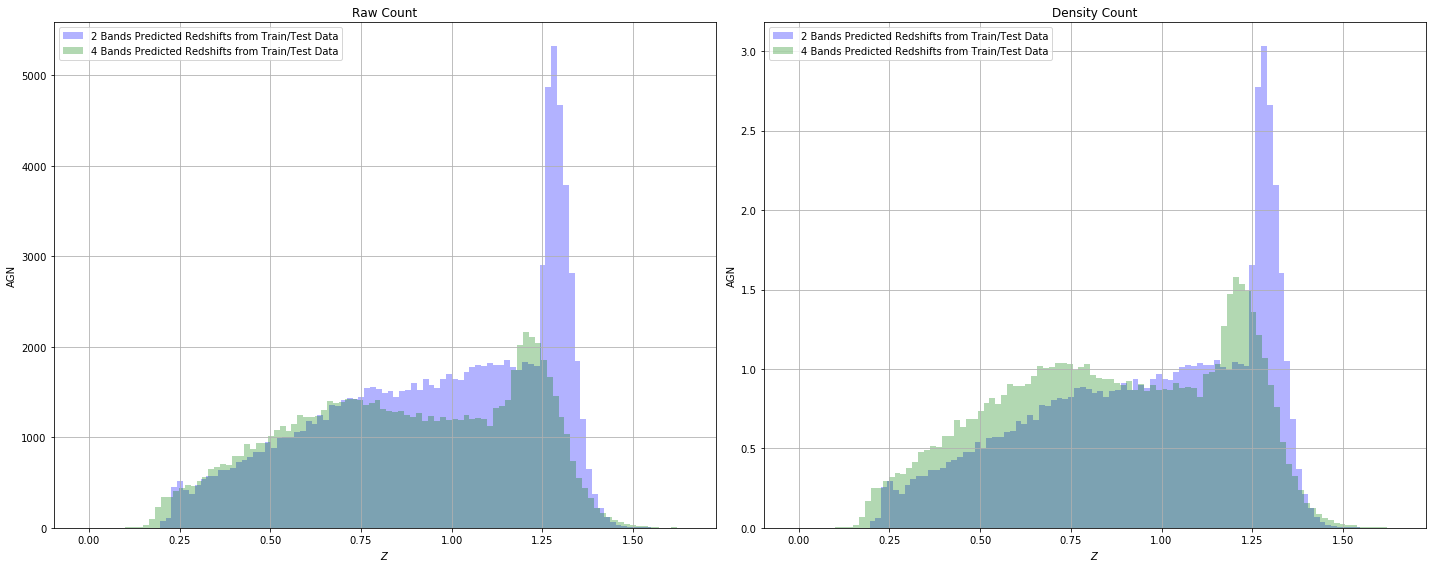

In [35]:
fig, (raw_test, density_test) = plt.subplots(1, 
                                             2, 
                                             figsize=[20,8], 
                                             tight_layout=True)

raw_test.hist(r2, 
              bins=100, 
              label='2 Bands Predicted Redshifts from Train/Test Data', 
              alpha=0.3, 
              color='b')
raw_test.hist(r4, 
              bins=100, 
              label='4 Bands Predicted Redshifts from Train/Test Data', 
              alpha=0.3, 
              color='g')
raw_test.set_xlabel('$Z$')
raw_test.set_ylabel('AGN')
raw_test.grid()
raw_test.legend()
raw_test.set_title('Raw Count')

density_test.hist(r2, 
                  bins=100, 
                  label='2 Bands Predicted Redshifts from Train/Test Data', 
                  alpha=0.3, 
                  color='b', 
                  density=True)
density_test.hist(r4, 
                  bins=100, 
                  label='4 Bands Predicted Redshifts from Train/Test Data', 
                  alpha=0.3, 
                  color='g', 
                  density=True)
density_test.set_xlabel('$Z$')
density_test.set_ylabel('AGN')
density_test.grid()
density_test.legend()
density_test.set_title('Density Count')

plt.savefig('plots/traintest_pred_redshift_histograms.pdf', 
            overwrite=True)
plt.show()

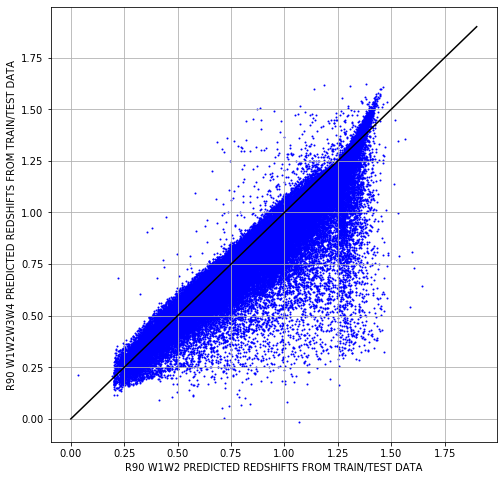

In [36]:
fig = plt.figure(figsize=[8,8])

plt.scatter(test_overlap['PREDICTED_REDSHIFT_x'], 
            test_overlap['PREDICTED_REDSHIFT_y'], 
            c='b', 
            s=1)
plt.plot(np.arange(0,2,0.1), 
         np.arange(0,2,0.1), 
         c='k')

plt.grid()
plt.xlabel('R90 W1W2 PREDICTED REDSHIFTS FROM TRAIN/TEST DATA')
plt.ylabel('R90 W1W2W3W4 PREDICTED REDSHIFTS FROM TRAIN/TEST DATA')

plt.savefig('plots/traintest_predicted_z_comparison.pdf')
plt.show()

# fit this and restrict it to start at origin, then get the coefficient, find the slope

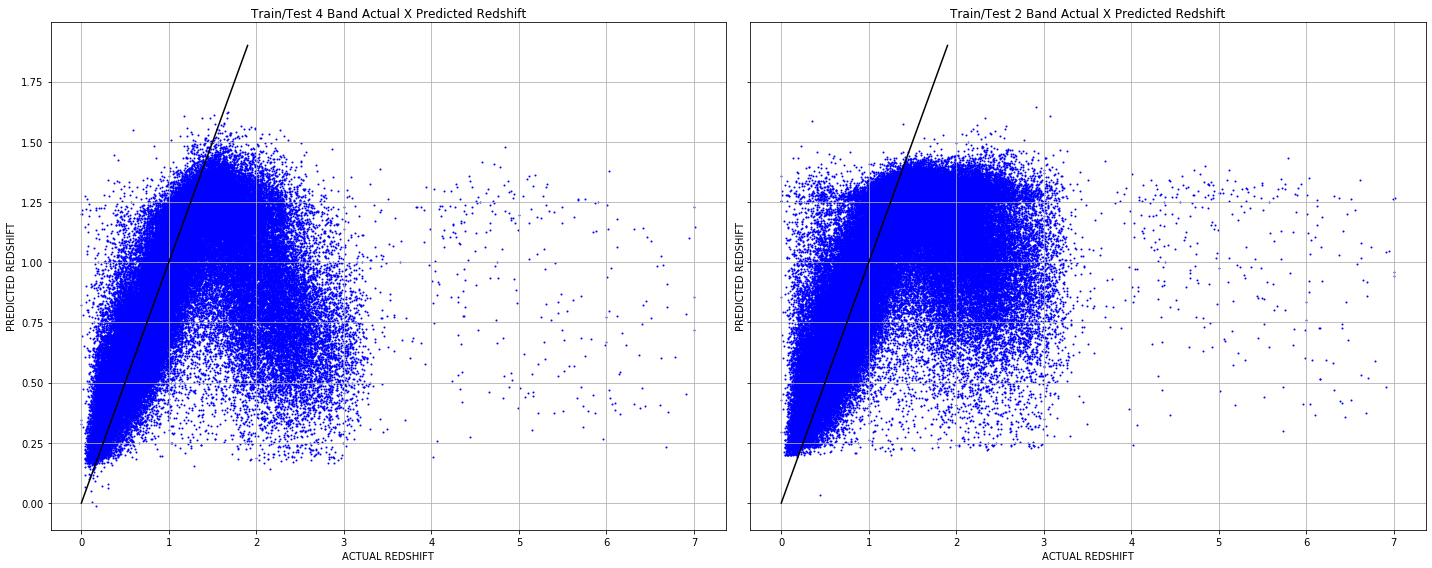

In [37]:
fig, (band4, band2) = plt.subplots(1,
                                   2,
                                   sharey=True,
                                   figsize=[20,8],
                                   tight_layout=True)

band4.scatter(d4['REDSHIFT'],
              d4['PREDICTED_REDSHIFT'],
              s=1,
              c='b')
band4.plot(np.arange(0,2,0.1),
           np.arange(0,2,0.1),
           c='k')
band4.set_xlabel('ACTUAL REDSHIFT')
band4.set_ylabel('PREDICTED REDSHIFT')
band4.grid()
band4.set_title('Train/Test 4 Band Actual X Predicted Redshift')

band2.scatter(d2['REDSHIFT'],
              d2['PREDICTED_REDSHIFT'],
              s=1,
              c='b')
band2.plot(np.arange(0,2,0.1), 
           np.arange(0,2,0.1),
           c='k')
band2.set_xlabel('ACTUAL REDSHIFT')
band2.set_ylabel('PREDICTED REDSHIFT')
band2.grid()
band2.set_title('Train/Test 2 Band Actual X Predicted Redshift')

plt.savefig('plots/traintest_predXactual_redshift_comparison.pdf', 
            overwrite=True)
plt.show()

In [ ]:
# final plots:

test_overlap_2 = d2_2.merge(d4_2, how='inner', on=['WISEA'])
test_overlap_15 = d2_15.merge(d4_15, how='inner', on=['WISEA'])

# predicted redshift using 0-2 predictor for 2 vs 4 band:
plt.scatter(test_overlap_2['PREDICTED_2_REDSHIFT_x'], 
            test_overlap_2['PREDICTED_2_REDSHIFT_y'], 
            c='b', 
            s=0.1)
plt.plot(np.arange(0,2,0.1), 
         np.arange(0,2,0.1), 
         c='k')
plt.grid()
plt.xlabel('R90 W1W2 PREDICTED REDSHIFTS FROM TRAIN/TEST DATA [0-2]')
plt.ylabel('R90 W1W2W3W4 PREDICTED REDSHIFTS FROM TRAIN/TEST DATA [0-2]')
plt.savefig('plots/traintest_predicted_z_comparison_2.pdf')
plt.show()

# predicted redshift using 0-1.5 predictor for 2 vs 4 band:
plt.scatter(test_overlap_15['PREDICTED_15_REDSHIFT_x'], 
            test_overlap_15['PREDICTED_15_REDSHIFT_y'], 
            c='b', 
            s=0.1)
plt.plot(np.arange(0,2,0.1), 
         np.arange(0,2,0.1), 
         c='k')
plt.grid()
plt.xlabel('R90 W1W2 PREDICTED REDSHIFTS FROM TRAIN/TEST DATA [0-1.5]')
plt.ylabel('R90 W1W2W3W4 PREDICTED REDSHIFTS FROM TRAIN/TEST DATA [0-1.5]')
plt.savefig('plots/traintest_predicted_z_comparison_15.pdf')
plt.show()

# predicted vs actual redshift using 0-1.5 predictor for 2 band data:
plt.scatter(test_overlap_15['REDSHIFT'],
            test_overlap_15['PREDICTED_15_REDSHIFT_x'],
            c='b', 
            s=0.1)
plt.plot(np.arange(0,2,0.1), 
         np.arange(0,2,0.1), 
         c='k')
plt.grid()
plt.xlabel('R90 W1W2 PREDICTED REDSHIFTS FROM TRAIN/TEST DATA [0-1.5]')
plt.ylabel('R90 W1W2 ACTUAL REDSHIFTS FROM TRAIN/TEST DATA [0-1.5]')
plt.savefig('plots/traintest_predXact_W1W2_15.pdf')
plt.show()

# predicted vs actual redshift using 0-2 predictor for 2 band data:
plt.scatter(test_overlap_2['REDSHIFT'],
            test_overlap_2['PREDICTED_15_REDSHIFT_x'],
            c='b', 
            s=0.1)
plt.plot(np.arange(0,2,0.1), 
         np.arange(0,2,0.1), 
         c='k')
plt.grid()
plt.xlabel('R90 W1W2 PREDICTED REDSHIFTS FROM TRAIN/TEST DATA [0-2]')
plt.ylabel('R90 W1W2 ACTUAL REDSHIFTS FROM TRAIN/TEST DATA [0-2]')
plt.savefig('plots/traintest_predXact_W1W2_2.pdf')
plt.show()

# predicted vs actual redshift using 0-1.5 predictor for 4 band data:
plt.scatter(test_overlap_15['REDSHIFT'],
            test_overlap_15['PREDICTED_15_REDSHIFT_y'],
            c='b', 
            s=0.1)
plt.plot(np.arange(0,2,0.1), 
         np.arange(0,2,0.1), 
         c='k')
plt.grid()
plt.xlabel('R90 W1W2W3W4 PREDICTED REDSHIFTS FROM TRAIN/TEST DATA [0-1.5]')
plt.ylabel('R90 W1W2W3W4 ACTUAL REDSHIFTS FROM TRAIN/TEST DATA [0-1.5]')
plt.savefig('plots/traintest_predXact_W1W2W3W4_15.pdf')
plt.show()

# predicted vs actual redshift using 0-2 predictor for 4 band data:
plt.scatter(test_overlap_2['REDSHIFT'],
            test_overlap_2['PREDICTED_15_REDSHIFT_y'],
            c='b', 
            s=0.1)
plt.plot(np.arange(0,2,0.1), 
         np.arange(0,2,0.1), 
         c='k')
plt.grid()
plt.xlabel('R90 W1W2W3W4 PREDICTED REDSHIFTS FROM TRAIN/TEST DATA [0-2]')
plt.ylabel('R90 W1W2W3W4 ACTUAL REDSHIFTS FROM TRAIN/TEST DATA [0-2]')
plt.savefig('plots/traintest_predXact_W1W2W3W4_2.pdf')
plt.show()